# Example Usage of ConturPy
## Noah Stockwell 4/17/2022

This repository depends on numpy and scipy. Pandas is required to use ConturTable.to_pandas() routine which is exposed for the user, but not implemented in this example.

Although ConturPy consists of many files, only ConturSettings and ConturApplication are required to do most standard work with Contur. ConturSettings provides a class-based interface to create input cards for Contur and ConturApplication provides the runtime and results for the compiled Contur executable. 

In [1]:
from conturpy import ConturSettings, ConturApplication

First, we must create the input parameters for Contur. Below, input cards for designing a Mach 5 nozzle are created programmatically.

In [2]:
c = ConturSettings()

dmach = 5                 # design mach
throat_radius = 0.26 / 2  # inches

# Card 1: the title of the simulation
c["ITLE"] = f"Mach {dmach}"

# Card 2 contains gas properties. As air is the assumed working fluid, no changes are required

# Card 3: key design parameters
c["ETAD"] = 60      # Angle at point D
c["RC"] = 6.0       # Radius of curvature at throat [multiple of throat radius]
c["CMC"] = dmach    # Design mach
c["SF"] = throat_radius

# Card 6 (B): stagnation and heat transfer properties
c["PPQ"] = 120      # Stagnation pressure [psia]
c["TO"] = 1000      # Stagnation temperature [R]
c["TWT"] = 540      # Wall temperature [R]
c["TWAT"] = 540     # Water-cooling temp [R] (suggest setting to TWT since water cooling not assumed)

# Card 7 (D): interpolation parameters
c["XLOW"] = 0       # Point to begin interpolating contour [in]
c["XEND"] = 20      # Point to end interpolating contour [in]
c["XINC"] = .1      # Increment to interpolate by [in]

# Create the input text file and save it to 'm5.0.txt' in the folder 'inputcards'
c.print_to_input(file_name=f'm{dmach:.1f}.txt', output_directory='inputcards')

Next, initialize and run the Contur executable for all files in the 'inputcards' folder and send all outputs to the 'outputs' folder. All files used as inputs are automatically removed. A ConturResults instance is created for every input and returned.

Contur's boundary layer output is unusual and the author could not figure out how to treat this subsection. Attempting to read boundary layer output will often throw a warning about un-formatted extra Contur array outputs, but this is fine as no data is lost.

In [3]:
ca = ConturApplication()
res = ca.batch_input_folder('inputcards', output_dir='outputs')

/Users/noahstockwell/PycharmProjects/contur-search/python/conturpy/read_output.py:435: UserWarning: Boundary Layer: Unable to add un-formatted extra CONTUR array output on line 76
  warnings.warn(


Lastly, for every ConturResult (we only have one from Mach 5.0), save plots and data in .csv files to a subfolder under the 'outputs' folder titled 'nozzle_5.0/'

The cell starts with %%capture to prevent drawing of half-finished plots

In [4]:
%%capture

for r in res:
    r.save_all(f'outputs/nozzle_{r.design_mach}')

Let's take a look at the generated plots

In [5]:
%%capture
from IPython.display import display
from conturpy import gen_bl_thickness_plot, gen_bl_temperature_plot, gen_noz_characteristics, \
    gen_throat_characteristics, gen_contours, gen_flow_angles, gen_flow_angles_throat

plot_fns = [gen_bl_thickness_plot, gen_bl_temperature_plot, gen_noz_characteristics, 
    gen_throat_characteristics, gen_contours, gen_flow_angles, gen_flow_angles_throat]

figs = []
for r in res:
    for plot_fn in plot_fns:
        f, ax = plot_fn(r)
        figs.append(f)

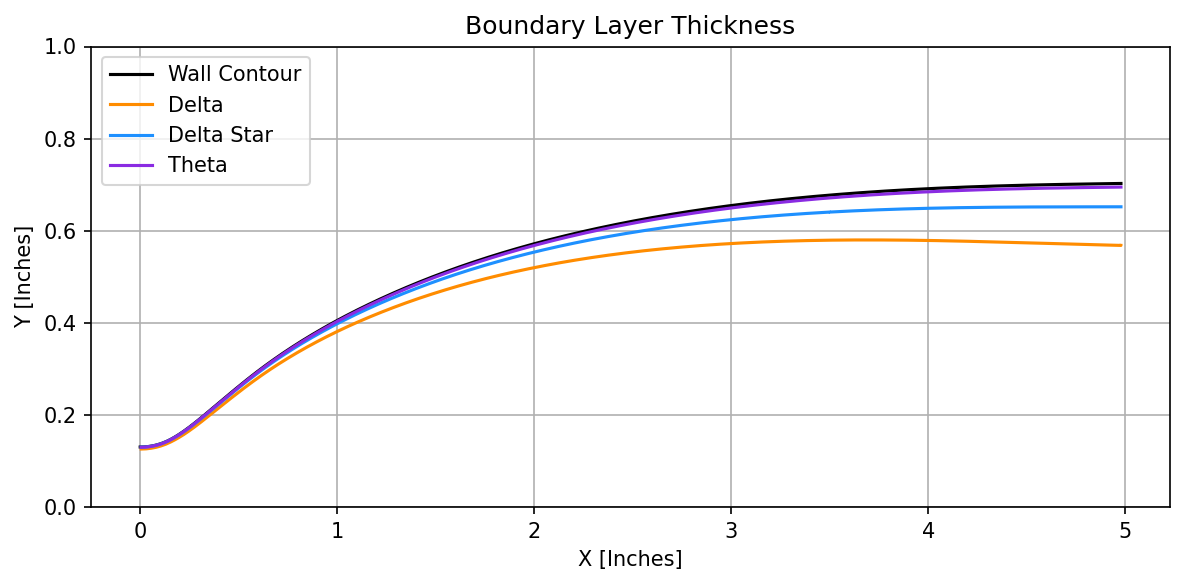

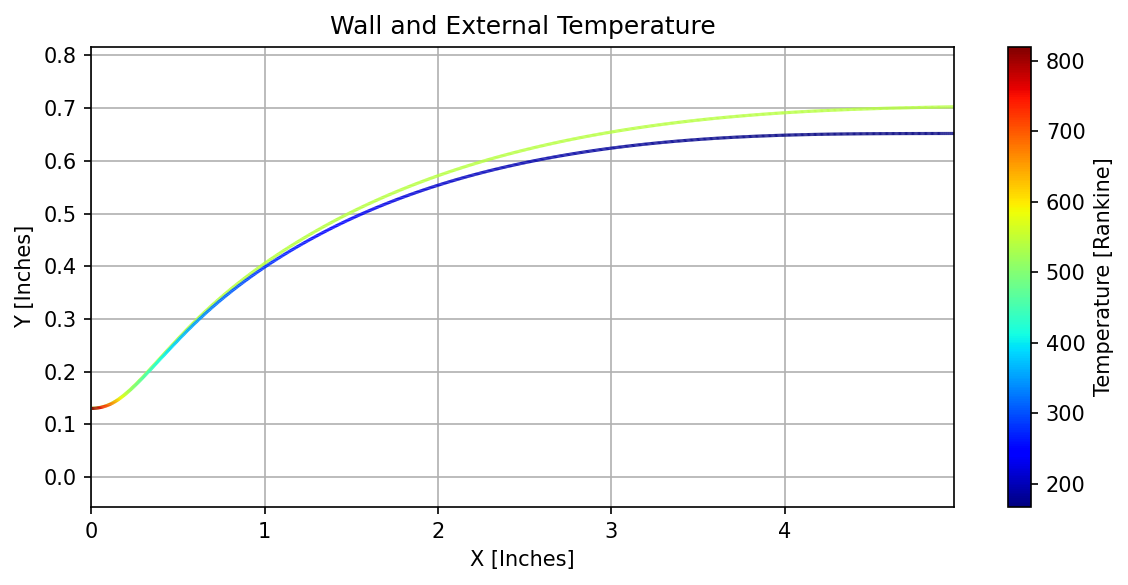

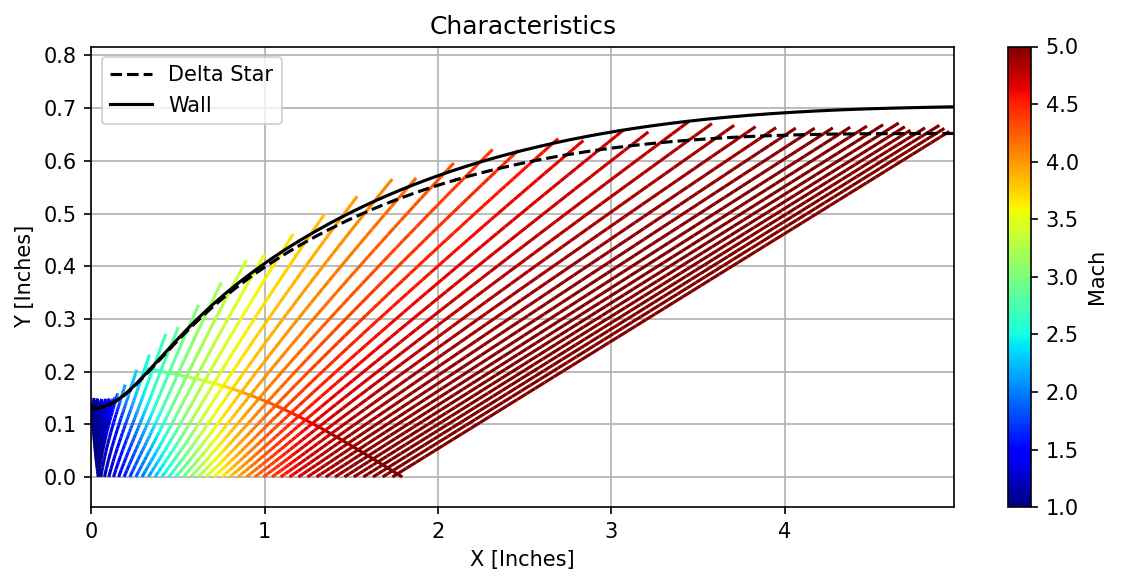

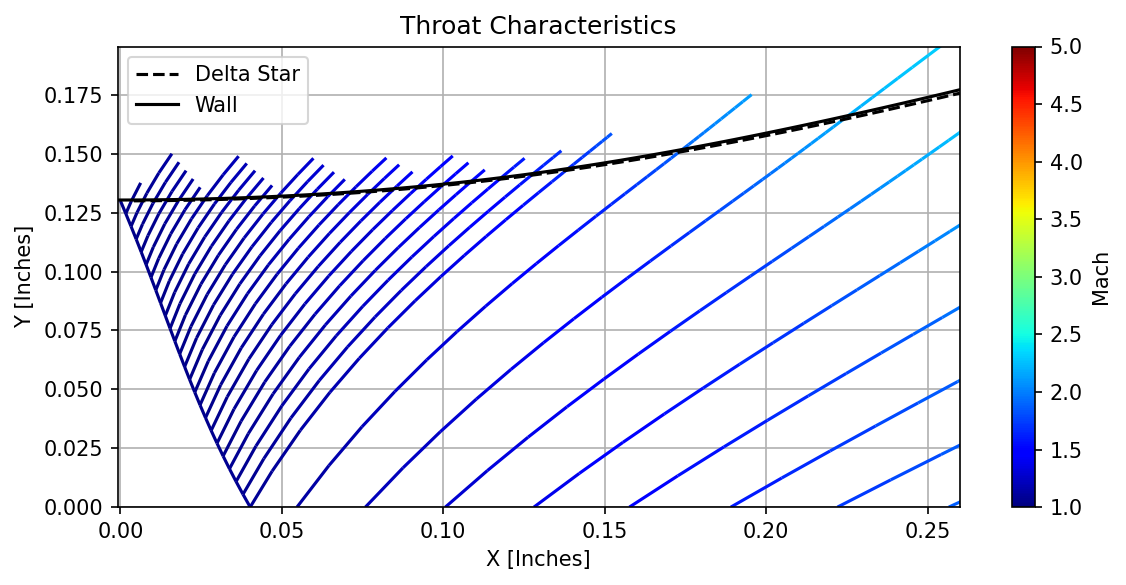

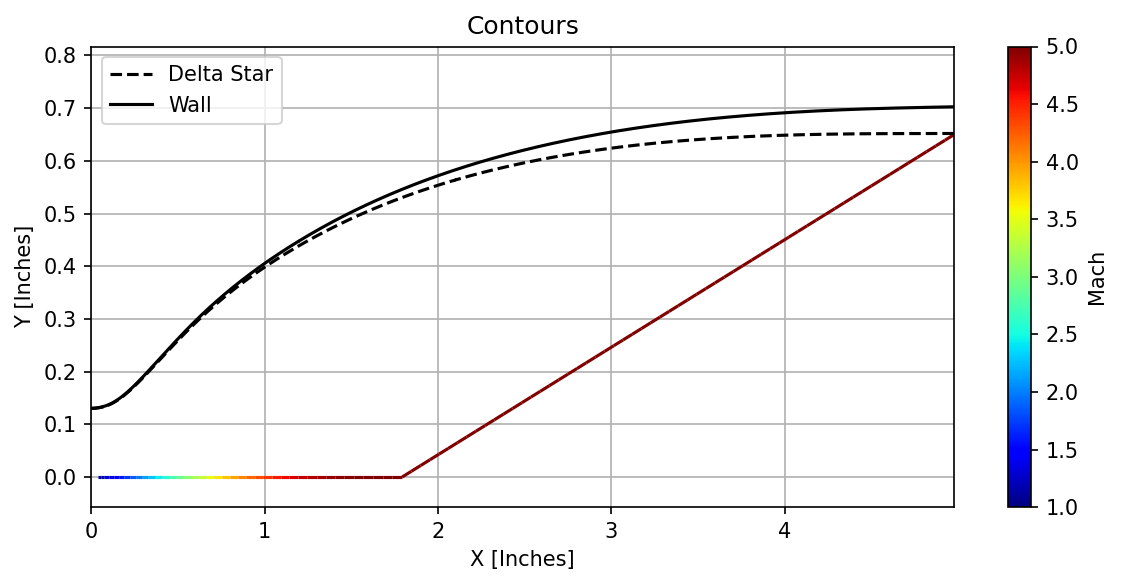

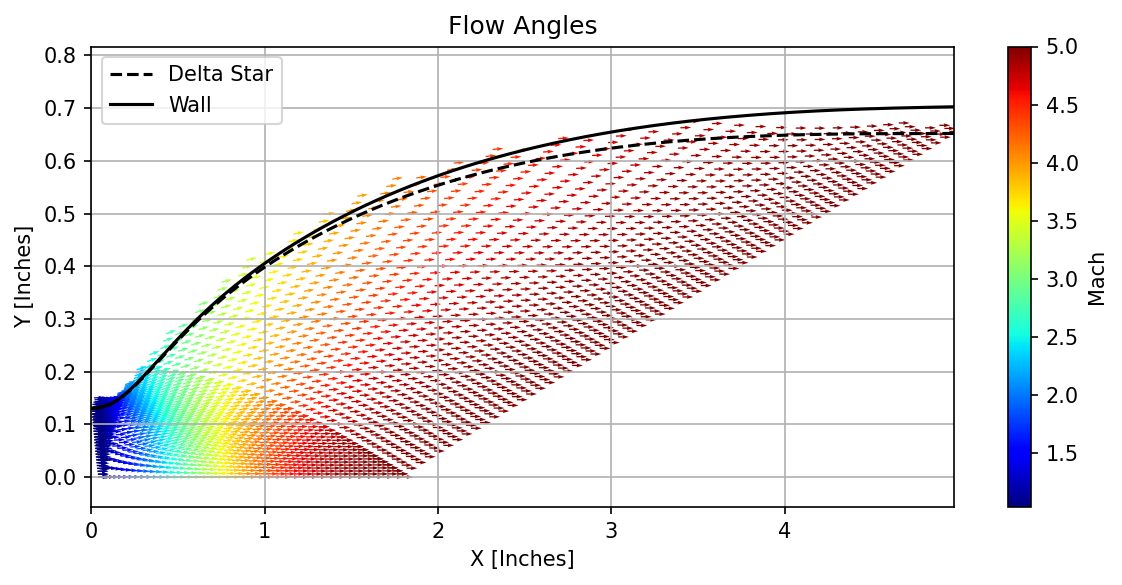

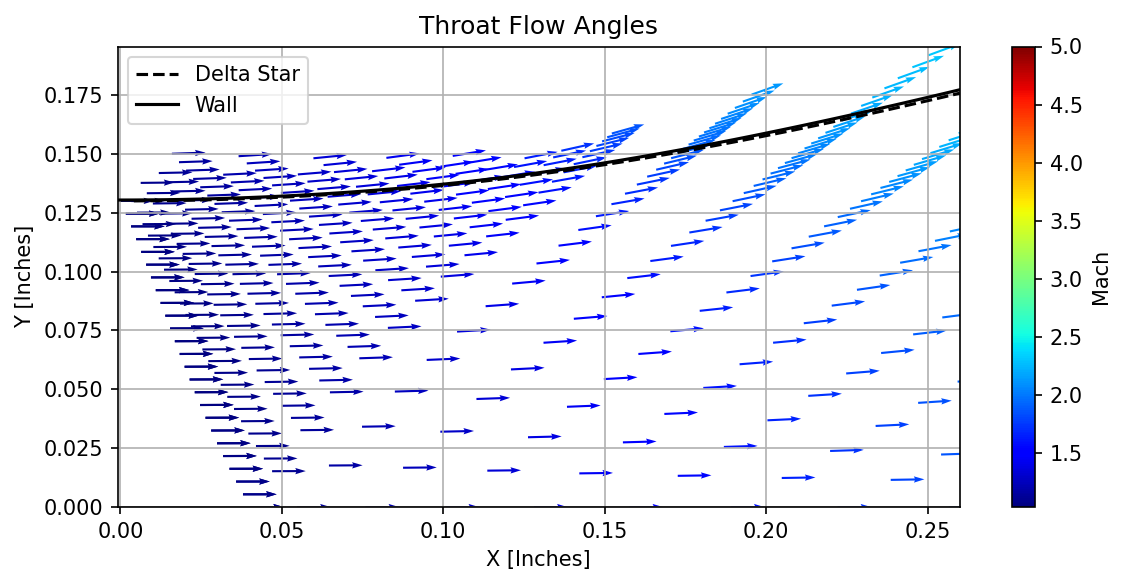

In [6]:
for f in figs:
    display(f)